In [2]:
import numpy as np
import matplotlib.pyplot as plt

#atomic units scaling
q = -1 
m = 1

x0 = 0
x0_prime = 0

t = np.linspace(-1, 6, 100)

#defining the acceleration, velocity, and position. Obtained via integration from the newton's eqn of motion
def a(t, tb=1):
    return np.cos(t)

def v(t, tb):
    return (np.sin(t)- np.sin(tb))

def x(t, tb):
    return (-np.cos(t)+np.cos(tb)-np.sin(tb)*(t-tb))



## Part 1
#### Implementation of the basic recollision behaviour, and finding the recollision time and energies

In [3]:
#bisection root finding slightly customised to this problem
def bisection_method(tb, lower, upper, tol=1e-10, max_iter=100):
    if x(upper,tb) * x(lower,tb) > 0: # root existence condition
        raise ValueError("f(a) and f(b) must have opposite signs.")
    iterations = 0
    while abs(upper - lower) > tol and iterations < max_iter:
        mid = (upper + lower) / 2
        
        if x(mid,tb) == 0: # exact root found
            break
        elif x(lower,tb) * x(mid,tb) < 0:
            upper = mid
        else:
            lower = mid
        iterations += 1
    return mid

In [4]:
# displaying the return possibilities in tabular format

print(f"{'Birth Time(s)':<20}{'Return Time(s)':<20}{'Energy(atomic Units)':<20}")
print("-" * 60)

energy = "" # placeholders

tb_range= np.arange(-1,1.1,0.2) # range as given in the question
for tb in tb_range:
    try:
        tr = bisection_method(tb, 2, 6) # this may throw ValueError this root can't be obtained
    except: # no roots found (ValueError handling)
        t_range = np.linspace(tb, 6, 25)
        energy = ""
        tr = "No return"
        
    else: # roots found
        t_range = np.linspace(tb, tr, 25)
        
        energy = 0.5*v(tr,tb)**2
        
    print(f"{round(tb,2):<20}{tr:<20}{energy:<20}")

Birth Time(s)       Return Time(s)      Energy(atomic Units)
------------------------------------------------------------
-1.0                No return                               
-0.8                No return                               
-0.6                No return                               
-0.4                No return                               
-0.2                No return                               
-0.0                No return                               
0.2                 4.782174621883314   0.715489447647753   
0.4                 4.145098392793443   0.7598711823947052  
0.6                 3.627628039161209   0.5322711197100746  
0.8                 3.1648455684189685  0.2742492978051928  
1.0                 2.732355614716653   0.09837340227827347 


## Part 3
#### plotting the recollision trajectories on top of the laser field, along with the energy distribution and the trajectory for Emax with a thick line

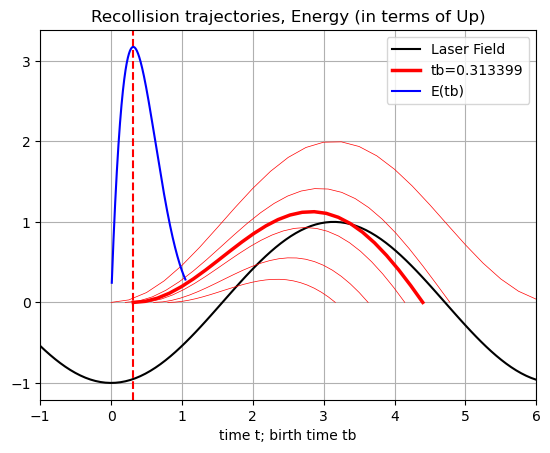

In [5]:
# plotting the laser field
plt.plot(t, -np.cos(t),"k" ,label="Laser Field")

# plotting intially for a birth time tb=0.5
# tb = 0.5
# tr = bisection_method(tb, 2,6)
# t_plot_range = np.linspace(tb,tr,50)
# plt.plot(t_plot_range, x(t_plot_range, tb))
# plt.title("Plot for tb = 0.5")
# plt.show()

# print(f"{'Birth Time(s)':<20}{'Return Time(s)':<20}{'Energy(atomic Units)':<20}")
# print("-" * 60)


# extending above code to the given range in the question (-1,1)
tb_range= np.arange(0,1,0.2)
for tb in tb_range:
    try:
        tr = bisection_method(tb, 2, 6)
    except: # no roots found
        t_range = np.linspace(tb, 6, 25)
    else: # roots found
        t_range = np.linspace(tb, tr, 25)
        
        energy = 0.5*v(tr,tb)**2
        # print(f"tb={round(tb,2)}\tenergy={round(energy,5)}")
        # print(f"{round(tb,2):<20}{tr:<20}{energy:<20}")
    plt.plot(t_range, x(t_range, tb), "r", linewidth= 0.5)   
    
# plot for the max energy 
tb = 0.313399
t_range = np.linspace(tb, bisection_method(tb, 2, 6), 25)
plt.plot(t_range, x(t_range, tb),"r",label=f"tb={tb}", linewidth=2.5)

plt.axvline(x=tb, color='r', linestyle='--')
    
E_recoll = []
tb_range = np.arange(0.01,1.05, 0.001)
for tb in tb_range:
    tr = bisection_method(tb, 2, 6)
    E_recoll.append(0.5*v(tr,tb)**2)  
E_recoll = np.array(E_recoll)/0.25
plt.plot(tb_range, E_recoll, "b" ,label="E(tb)")



plt.title("Recollision trajectories, Energy (in terms of Up)")
plt.xlim(-1,6)
plt.grid()
plt.xlabel("time t; birth time tb")
plt.legend()
plt.show()


## Part 2
#### Finding the derivative of the recollison energies, and finding the maxima, first numerically and then analytically

Numerical and **analytical** parts will be done seperately, so that cleaning up for the final diagram is easy

*analytical part failed*

Text(0.5, 1.0, 'Recollision Energies vs Birth Times')

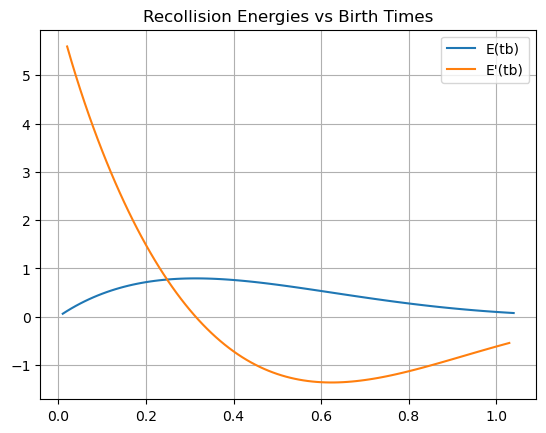

In [6]:
# we know from the graphs above that the actual return takes place only in the range of (0,1) in the given question
# let us plot the energy diagram for this on a graph with small steps between 0 and 1
E_recoll = []


tb_range = np.arange(0.01,1.05, 0.01)


for tb in tb_range:
    # bisection will not fail here as we have considered only the definite recollision tb here
    tr = bisection_method(tb, 2, 6)
    # print(round(tb,2), tr) # WORKING CHECK
    E_recoll.append(0.5*v(tr,tb)**2)
    
plt.plot(tb_range, E_recoll, label="E(tb)")



# Derivative of E(tb) using finite differences
# Since this is a 3 point stencil, length of the return array is 2 less than the passed arrays (first and last points missing, no endpoint implementation done here for simplicity)
def central_difference_derivatives(x, y):
    derivatives = []
    h = x[1] - x[0]  # Assuming uniform spacing
    
    for i in range(1, len(x) - 1):
        derivative = (y[i+1] - y[i-1]) / (2 * h)
        derivatives.append(derivative)
    
    return derivatives

E_recoll_deriv_numerical = central_difference_derivatives(tb_range, E_recoll)
plt.plot(tb_range[1:-1], E_recoll_deriv_numerical, label="E'(tb)")

plt.grid()
plt.legend()
plt.title("Recollision Energies vs Birth Times")


In [7]:
# determining the Max by looking at root of the first derivative
# since we a three arrays as shown : (each o represents a cell)
# birth time: oooooooooooooooo
# E_recoll  : oooooooooooooooo
# E_deriv   :  oooooooooooooo  (first and last missing due to central diff)

# first, equalise the derivative array
E_recoll_deriv_numerical = [10] + E_recoll_deriv_numerical + [10]

# traversing through the derivative array and finding the min error by comparing the derivative values to 0. Index with least difference wins.
def find_closest_value(array, key):
  """Finds the value in an array that is closest to the given key in absolute terms.

  Args:
    array: The input array.
    key: The key value to search for.

  Returns:
    A tuple containing the closest value and its index in the array.
  """

  closest_value = array[0]
  closest_index = 0
  closest_difference = abs(array[0] - key)

  for i, value in enumerate(array):
    difference = abs(value - key)
    if difference < closest_difference:
      closest_value = value
      closest_index = i
      closest_difference = difference

  return closest_value, closest_index

#as we are trying to get the index where the derivative is closest to zero
minDerivative, minDerivIndex = find_closest_value(E_recoll_deriv_numerical, 0)

print(f"Mininum val of derivative: {minDerivative}\nMax Energy (in Up terms): {E_recoll[minDerivIndex]/0.25}\nBirth Time:{tb_range[minDerivIndex]}")


Mininum val of derivative: 0.03585392450393132
Max Energy (in Up terms): 3.172898222275373
Birth Time:0.31


**Check for validity of derivative algo**
<br/>
Algo is valid

#### Parts after this are for demo/trials of logic 

0.001


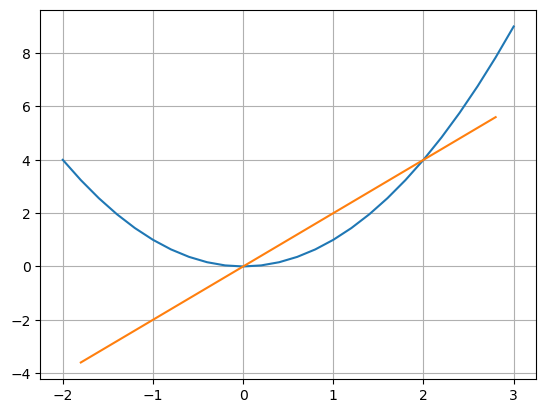

In [8]:
x = np.arange(-2, 3.1, 0.2)
y = x**2

x_prime = central_difference_derivatives(x,y)
plt.plot(x,y)
plt.plot(x[1:-1],x_prime)
plt.grid()


print(1e-3)

TypeError: 'numpy.ndarray' object is not callable

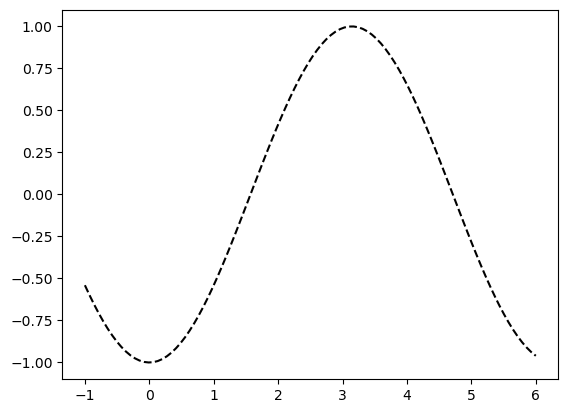

In [9]:
# plotting the laser field
plt.plot(t, -np.cos(t),"--k" ,label="Laser Field")
# plotting intially for a birth time tb=0.5
tb = 0.5
tr = bisection_method(tb, 2,6)
tr
# t_plot_range = np.linspace(tb,tr,50)
# plt.plot(t_plot_range, x(t_plot_range, tb))
# plt.title("Plot for tb = 0.5")
# plt.show()

# extending above code to the given range in the question (-1,1)
# tb_range= np.arange(0,1,0.2)
# for tb in tb_range:
#     try:
#         tr = bisection_method(tb, 2, 6)
#     except: # no roots found
#         t_range = np.linspace(tb, 6, 25)
#     else: # roots found
#         t_range = np.linspace(tb, tr, 25)
        
#         energy = 0.5*v(tr,tb)**2
    # plt.plot(t_range, x(t_range, tb), "r", linewidth= 1)   
    
# plot for the max energy 
# tb = 0.313399
# t_range = np.linspace(tb, bisection_method(tb, 2, 6), 25)
# plt.plot(t_range, x(t_range, tb),"r",label=f"tb={tb}", linewidth=2.5)
 
# plt.title("Plots for tb = [-1,1]")
# plt.xlim(-1,6)
# plt.grid()
# plt.xlabel("time t; birth time t_b")
# plt.legend()
# plt.show()
    